In [1]:
# adding imutils to our virtual environment
import sys
sys.path.append('../input/imutils-054/imutils-0.5.4')

In [2]:
!pip3 install imutils

  Preparing metadata (setup.py) ... - done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=738cd1ee965fdbbe0529429ba369c1ceb9db617f0f21726777f2157f7f68b7a7
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [3]:
from imutils import paths
import os
import cv2
import imageio as iio
import datetime
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

import torch
import torchvision
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes

import pickle

In [4]:
MAIN_PATH = f'/kaggle/input/smartathondataset/dataset/'

df = pd.read_csv(f'{MAIN_PATH}train.csv')

df['class'] = df['class'].astype('int32')

display(max(df['xmax']))

tstimgNo = 12000

display(df.head())

df.iloc[tstimgNo,:]

1384.0

,class,image_path,name,xmax,xmin,ymax,ymin
0,3,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,797.0,701.0,262.0,211.0
1,3,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,932.0,786.0,329.0,238.0
2,3,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,736.0,657.0,275.0,229.0
3,7,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,986.0,786.0,136.0,0.0
4,8,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,667.0,549.0,228.0,179.0


class                                            3
image_path    b5ddb36a1bdc4556567c2db4053eb3ee.jpg
name                                       GARBAGE
xmax                                         641.0
xmin                                         570.0
ymax                                         335.0
ymin                                         256.0
Name: 12000, dtype: object

In [5]:
imgpth = df.iloc[tstimgNo,:][1]
print(f'Dataset/Theme 1/dataset/images/{imgpth}')


imgclss = df.iloc[tstimgNo,:][2]
xmax = int(df.iloc[tstimgNo,:][3])
xmin = int(df.iloc[tstimgNo,:][4]) 
ymax = int(df.iloc[tstimgNo,:][5])
ymin = int(df.iloc[tstimgNo,:][6])

tstimg = cv2.imread(f'/kaggle/input/smartathondataset/dataset/images/{imgpth}')



Dataset/Theme 1/dataset/images/b5ddb36a1bdc4556567c2db4053eb3ee.jpg


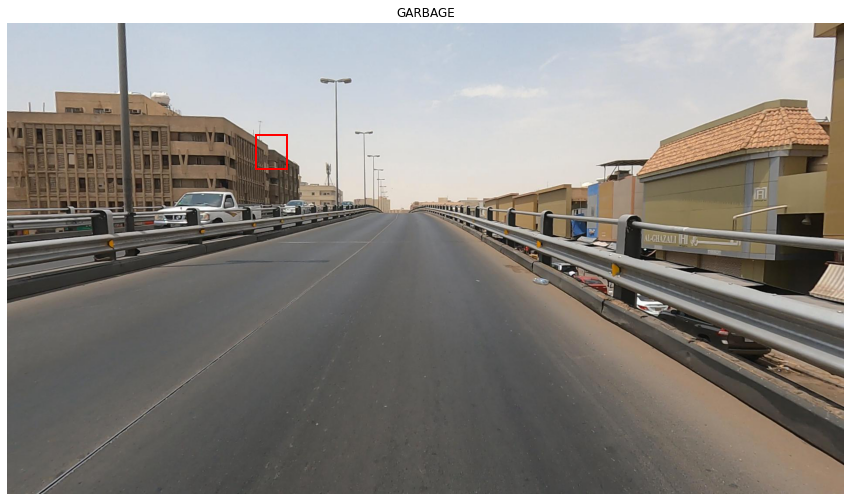

In [6]:
from matplotlib.patches import Rectangle

tstimg2 = iio.v3.imread(f'/kaggle/input/smartathondataset/dataset/images/{imgpth}')
plt.figure(figsize=(15,20))
plt.gca().add_patch(Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))
# plt.grid()
plt.title(imgclss)
plt.xticks(np.arange(0, 1920, 200))
plt.imshow(tstimg2)
plt.axis('off')

plt.savefig('original.png', bbox_inches='tight')

# Multiplying by a scaler

In [7]:
imgpth = df.iloc[tstimgNo,:][1]
print(f'Dataset/Theme 1/dataset/images/{imgpth}')


imgclss = df.iloc[tstimgNo,:][2]
xmax = int(df.iloc[tstimgNo,:][3]) * 2
xmin = int(df.iloc[tstimgNo,:][4]) * 2
ymax = int(df.iloc[tstimgNo,:][5]) * 2
ymin = int(df.iloc[tstimgNo,:][6]) * 2

tstimg = cv2.imread(f'/kaggle/input/smartathondataset/dataset/images/{imgpth}')



Dataset/Theme 1/dataset/images/b5ddb36a1bdc4556567c2db4053eb3ee.jpg


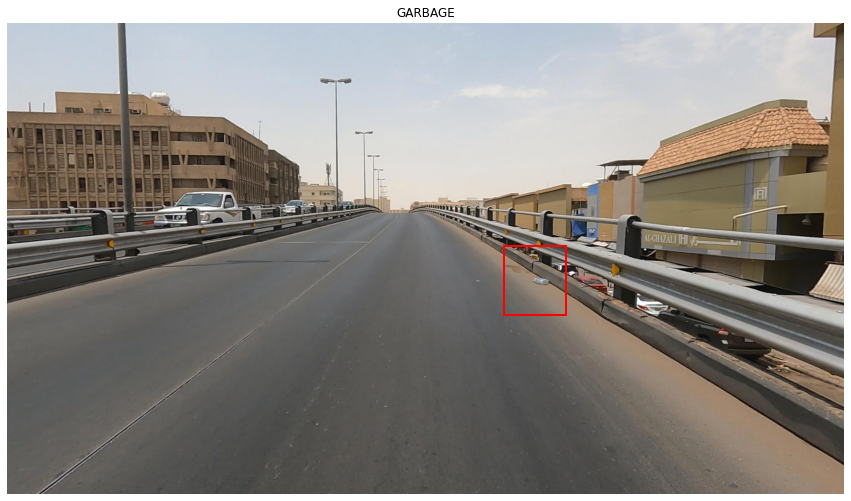

In [8]:
from matplotlib.patches import Rectangle

tstimg2 = iio.v3.imread(f'/kaggle/input/smartathondataset/dataset/images/{imgpth}')
plt.figure(figsize=(15,20))
plt.gca().add_patch(Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))
# plt.grid()
plt.title(imgclss)
plt.xticks(np.arange(0, 1920, 200))
plt.imshow(tstimg2)
plt.axis('off')

plt.savefig('manipulated.png', bbox_inches='tight')